In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("parkinsons.data", sep=",")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
corr_matrix = df.corr()
corr_matrix["status"].sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64

In [4]:
df = df[["status", "spread1", "PPE", "MDVP:Flo(Hz)", "MDVP:Fo(Hz)"]]
df.head()

,status,spread1,PPE,MDVP:Flo(Hz),MDVP:Fo(Hz)
0,1,-4.813031,0.284654,74.997,119.992
1,1,-4.075192,0.368674,113.819,122.400
2,1,-4.443179,0.332634,111.555,116.682
3,1,-4.117501,0.368975,111.366,116.676
4,1,-3.747787,0.410335,110.655,116.014


In [5]:
df = df.dropna()
X = df.drop(["status"], axis=1)
y = df["status"]

In [6]:
X_std = StandardScaler().fit_transform(X)

In [7]:
pca = PCA(n_components=2)
X_transform = pca.fit_transform(X_std)
X_transform

array([[-1.70571274e+00, -2.57883782e-01],
       [-2.18785715e+00,  9.99124158e-01],
       [-1.86186525e+00,  5.69926767e-01],
       [-2.25371955e+00,  8.78084693e-01],
       [-2.71117904e+00,  1.21339488e+00],
       [-2.05484304e+00,  8.55177513e-01],
       [-4.38021258e-01, -4.14610795e-01],
       [-1.13094049e-01, -1.17048355e+00],
       [-1.12202016e+00, -8.84077047e-01],
       [-1.62892642e+00, -5.10532283e-01],
       [-1.51747028e+00, -8.93775385e-01],
       [-1.76641606e+00, -5.73526797e-01],
       [ 8.23442568e-01, -7.03890349e-01],
       [-5.28984281e-01, -7.46233053e-01],
       [ 2.28135509e-02, -9.00120189e-01],
       [-8.08223237e-01, -3.19994429e-01],
       [-6.38669659e-01, -4.21640264e-01],
       [-3.03925690e+00,  1.84798774e+00],
       [-2.42559476e+00,  8.92147865e-01],
       [-1.00216142e+00,  1.40201790e+00],
       [-2.29607809e+00,  7.47582619e-01],
       [-9.64711702e-01, -4.65739326e-02],
       [-1.40560384e+00,  6.04654770e-01],
       [-5.

In [8]:
X_transform = pd.DataFrame(data = X_transform, columns = ["principal component 1", "principal component 2"])
final_data = pd.concat([X_transform, y], axis=1)
final_data.head()

,principal component 1,principal component 2,status
0,-1.705713,-0.257884,1
1,-2.187857,0.999124,1
2,-1.861865,0.569927,1
3,-2.253720,0.878085,1
4,-2.711179,1.213395,1


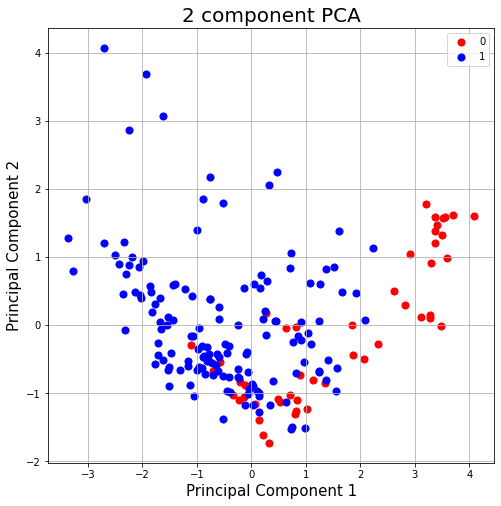

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_data['status'] == target
    ax.scatter(final_data.loc[indicesToKeep, 'principal component 1']
               ,final_data.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()
plt.savefig('PCA_plot.png')

In [10]:
pca.explained_variance_ratio_

array([0.64055829, 0.24980052])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
model.score(X_test, y_test)

0.8205128205128205